# 2. Data Cleaning and Imputation

## 1) Addressing missing data

In [2]:
# Addressing missing data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
salaries = pd.read_csv('../../Datasets/datacamp_dataset/EDA/data_science_salaries.csv')

In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_USD            607 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 38.1+ KB


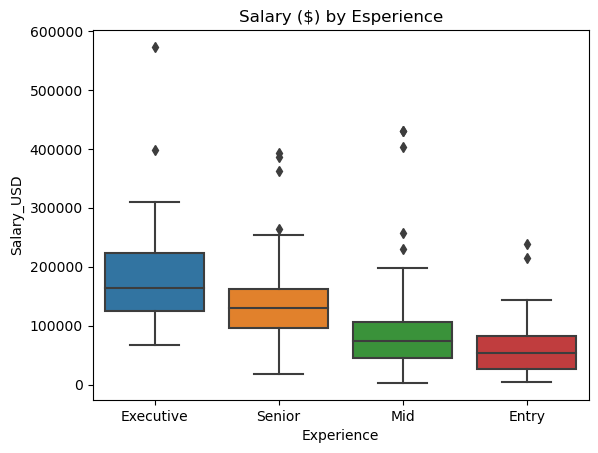

In [5]:
sns.boxplot(data=salaries, x='Experience', y='Salary_USD', order=['Executive', 'Senior', 'Mid', 'Entry']).set(title='Salary ($) by Esperience')
# fig = plt.figure()
plt.show()

In [6]:
# Checking for missing values
salaries.isna().sum()

Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64

### Dropping missing values

In [7]:
# 누락된 값 계산을 위한 임계값 설정.
threshold = len(salaries) * 0.05
print(threshold)

30.35


In [8]:
# 임계값보다 낮은 수준의 missing value를 갖고 있는 애들은 drop해도 괜찮음.
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
salaries.dropna(subset=cols_to_drop, inplace=True)

In [9]:
# drop을 하지 못하는 missing values에 대해 처리해야한다.
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]

for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0])

In [10]:
salaries.columns

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD'],
      dtype='object')

In [11]:
# 그냥 mode로만 접근하면 df를 반환하게 된다.
for col in salaries.columns[:-1]:
    print(salaries[col].mode())

0    2022
Name: Working_Year, dtype: int64
0    Data Scientist
Name: Designation, dtype: object
0    Senior
Name: Experience, dtype: object
0    FT
Name: Employment_Status, dtype: object
0    US
Name: Employee_Location, dtype: object
0    M
Name: Company_Size, dtype: object
0    100
Name: Remote_Working_Ratio, dtype: int64


In [12]:
# 아래와 같이 index로 접근해주자.
for col in salaries.columns[:-1]:
    print(salaries[col].mode()[0])

2022
Data Scientist
Senior
FT
US
M
100


### Imputating by sub-group

In [13]:
# 왜 굳이 to_dict를 해줬을까?
salaries_dict = salaries.groupby('Experience')['Salary_USD'].median().to_dict()
salaries_dict

{'Entry': 53948.0, 'Executive': 163694.5, 'Mid': 73465.0, 'Senior': 129380.0}

In [14]:
salaries_groupby_exp = salaries.groupby('Experience')['Salary_USD'].median()
salaries_groupby_exp

Experience
Entry         53948.0
Executive    163694.5
Mid           73465.0
Senior       129380.0
Name: Salary_USD, dtype: float64

In [15]:
# dictionary와 맵핑시키기 위해서 딕셔너리로 바꿔줬구나.
salaries['Salary_USD'] = salaries['Salary_USD'].fillna(salaries['Experience'].map(salaries_dict))

In [16]:
# 아니라 그냥 df로 매핑시켜도 똑같은데?
salaries['Experience'].map(salaries_groupby_exp)

0       73465.0
1      129380.0
2      129380.0
3       73465.0
4      129380.0
         ...   
602    129380.0
603    129380.0
604    129380.0
605    129380.0
606     73465.0
Name: Experience, Length: 607, dtype: float64

## 2) Converting and anlyzing categorical data

In [17]:
# categorical value들만 골라내는 메서드 select_dtypes
salaries.select_dtypes('object').head()

,Designation,Experience,Employment_Status,Employee_Location,Company_Size
0,Data Scientist,Mid,FT,DE,L
1,Machine Learning Scientist,Senior,FT,JP,S
2,Big Data Engineer,Senior,FT,GB,M
3,Product Data Analyst,Mid,FT,HN,S
4,Machine Learning Engineer,Senior,FT,US,L


In [18]:
salaries['Designation'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [19]:
# 고유한 값이 몇 개인지 세어보자.
print(len(salaries['Designation'].value_counts()))
print(salaries['Designation'].nunique())

50
50


In [28]:
# 가장 종사자 수가 많은 직업 상위 5개만 bar plot으로 표시
top_5_Desingation = salaries['Designation'].value_counts().head()
sorted_top_5 = top_5_Desingation.sort_values(ascending=False)

# sns.barplot(x=salaries['Designation'], y=designation)
# sns.barplot(data=salaries['Designation'].value_counts(), x='Designation')
# plt.show()

In [30]:
# cycle - 무한히 순환하는 루프 이터레이터
# islice(seq, [start,] stop [,step])
list(islice(cycle(['b', 'r', 'g', 'y', 'k']), 10))

['b', 'r', 'g', 'y', 'k', 'b', 'r', 'g', 'y', 'k']

<Axes: >

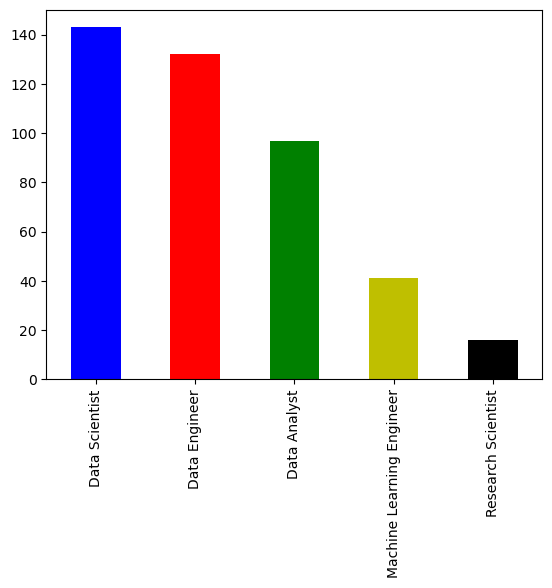

In [31]:
# color 만들어서 입혀주기
from itertools import cycle, islice

# 5개의 색상만 사용하는 경우
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), 5))
sorted_top_5.plot(kind='bar', color=my_colors)

In [60]:
# custom color 생성 및 그라데이션
my_colors_gb = ['g', 'b'] * 5 # <-- 단순히 5개씩 반복
my_colors_float = [(0.5, 0.4, 0.5), (0.75, 0.75, 0.25)]*5 # <-- 마찬가지로 두 개의 커스텀 색상 반복
my_colors_grad = [(x/7.5, x/10.0, 0.75) for x in range(5)] # <-- 빠른 그라데이션 컬러 만들기

<Axes: title={'center': 'Job titles'}>

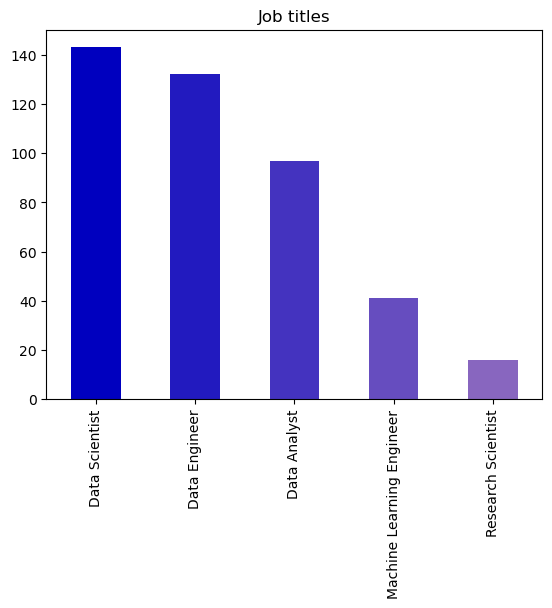

In [62]:
sorted_top_5.plot(kind='bar', color=my_colors_grad, title='Job titles')